In [1]:
# Import necessary libraries from TensorFlow, Keras, and other utilities.
import numpy as np
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer
from nltk.corpus import stopwords
import nltk
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, GRU, Dense, Bidirectional, LSTM
from matplotlib import pyplot as plt

# Download the stopwords from NLTK
nltk.download('stopwords')

# Load the IMDB dataset and limit it to the top 10,000 most frequent words
max_features = 10000 
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=max_features)

# Create a reverse dictionary to decode reviews back to words
word_index = imdb.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

# Function to decode reviews from sequences of integers to words
def review_decoded(encoded_review):
    return ' '.join([reverse_word_index.get(i - 3, '?') for i in encoded_review])

# Decode all reviews in the training and test sets
train_decoded = [review_decoded(review) for review in X_train]
test_decoded = [review_decoded(review) for review in X_test]

# Remove stop words from the reviews
stop_words = set(stopwords.words('english'))
def remove_stop_words(text):
    return ' '.join([word for word in text.split() if word not in stop_words])
train_cleaned = [remove_stop_words(review) for review in train_decoded]
test_cleaned = [remove_stop_words(review) for review in test_decoded]

# Tokenize the cleaned reviews
tokenizer = Tokenizer(num_words=max_features)
tokenizer.fit_on_texts(train_cleaned)

# Convert the tokenized reviews to sequences
train_sequences = tokenizer.texts_to_sequences(train_cleaned)
test_sequences = tokenizer.texts_to_sequences(test_cleaned)

# Pad the sequences to ensure they all have the same length
max_len = 100  
X_train = pad_sequences(train_sequences, maxlen=max_len)
X_test = pad_sequences(test_sequences, maxlen=max_len)

# Print the original and cleaned version of the first training review
print("Original review:", train_decoded[0])
print("Cleaned review:", train_cleaned[0])

[nltk_data] Downloading package stopwords to C:\Users\SACHIN
[nltk_data]     HARSANA\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Original review: ? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have d

In [ ]:
# Function to create, compile and train a model
def compile_and_train(model, epochs=10):
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])
    history = model.fit(X_train, y_train, epochs=epochs, batch_size=32, validation_split=0.3)
    return history

# Create, compile, and train the first model
model_1 = Sequential()
model_1.add(Embedding(max_features, 32)) 
model_1.add(GRU(32)) 
model_1.add(Dense(1, activation='sigmoid'))
history_1 = compile_and_train(model_1)

# Create, compile, and train the second model 
model_2 = Sequential()
model_2.add(Embedding(max_features, 32))  
model_2.add(GRU(32, return_sequences=True))  
model_2.add(GRU(32))
model_2.add(Dense(1, activation='sigmoid')) 
history_2 = compile_and_train(model_2)

# Create, compile, and train the third model
model_3 = Sequential()
model_3.add(Embedding(max_features, 32)) 
model_3.add(Bidirectional(GRU(32)))  
model_3.add(Dense(1, activation='sigmoid')) 
history_3 = compile_and_train(model_3)

# Create, compile, and train the fourth model
model_4 = Sequential()
model_4.add(Embedding(max_features, 32)) 
model_4.add(Bidirectional(GRU(32, return_sequences=True)))  
model_4.add(Bidirectional(GRU(32)))  
model_4.add(Dense(1, activation='sigmoid')) 
history_4 = compile_and_train(model_4)

# Create, compile, and train the fifth model
model_5 = Sequential()
model_5.add(Embedding(max_features, 32)) 
model_5.add(LSTM(32)) 
model_5.add(Dense(1, activation='sigmoid'))
history_5 = compile_and_train(model_5)

# Create, compile, and train the sixth model
model_6 = Sequential()
model_6.add(Embedding(max_features, 32))  
model_6.add(LSTM(32, return_sequences=True))  
model_6.add(LSTM(32))
model_6.add(Dense(1, activation='sigmoid')) 
history_6 = compile_and_train(model_6)

# Create, compile, and train the seventh model
model_7 = Sequential()
model_7.add(Embedding(max_features, 32)) 
model_7.add(Bidirectional(LSTM(32)))  
model_7.add(Dense(1, activation='sigmoid')) 
history_7 = compile_and_train(model_7)

# Create, compile, and train the eighth model
model_8 = Sequential()
model_8.add(Embedding(max_features, 32)) 
model_8.add(Bidirectional(LSTM(32, return_sequences=True)))  
model_8.add(Bidirectional(LSTM(32)))  
model_8.add(Dense(1, activation='sigmoid')) 
history_8 = compile_and_train(model_8)

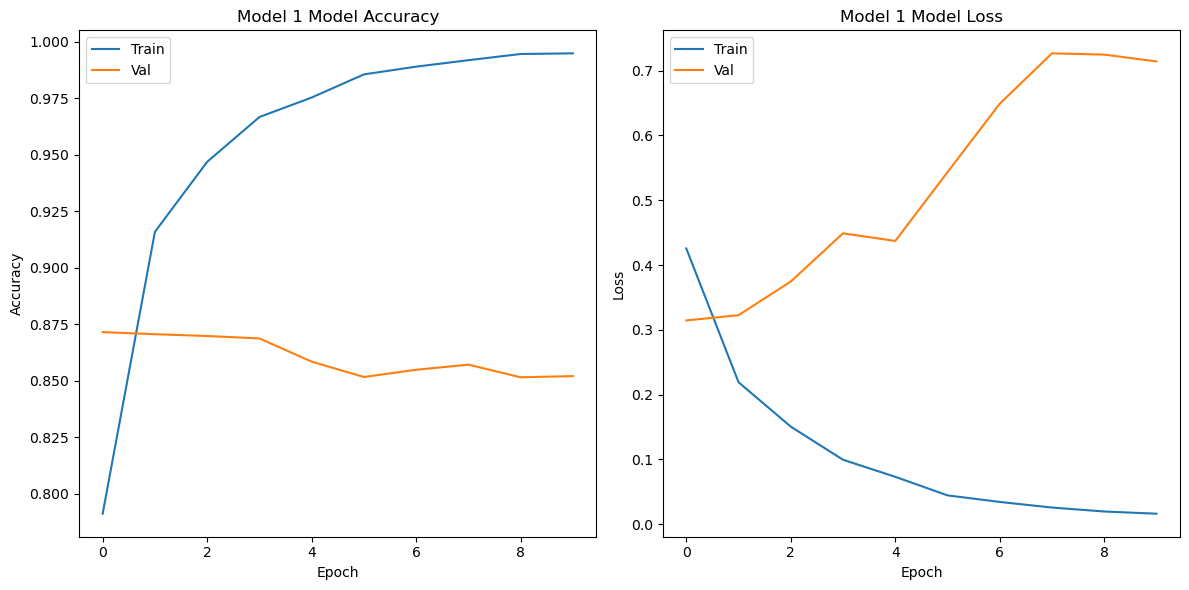

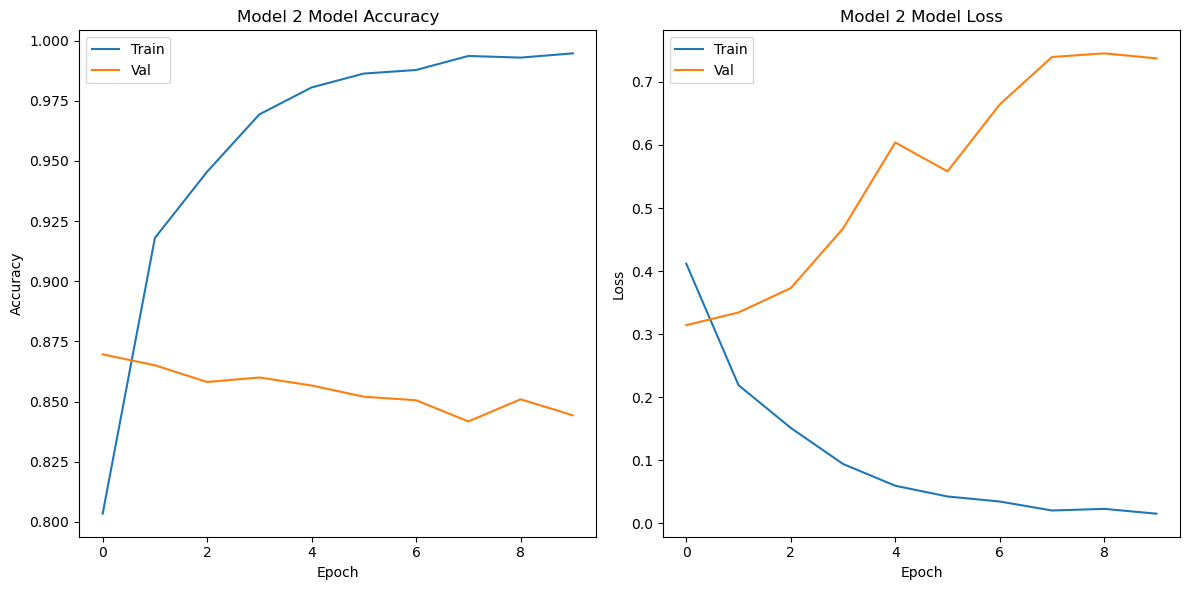

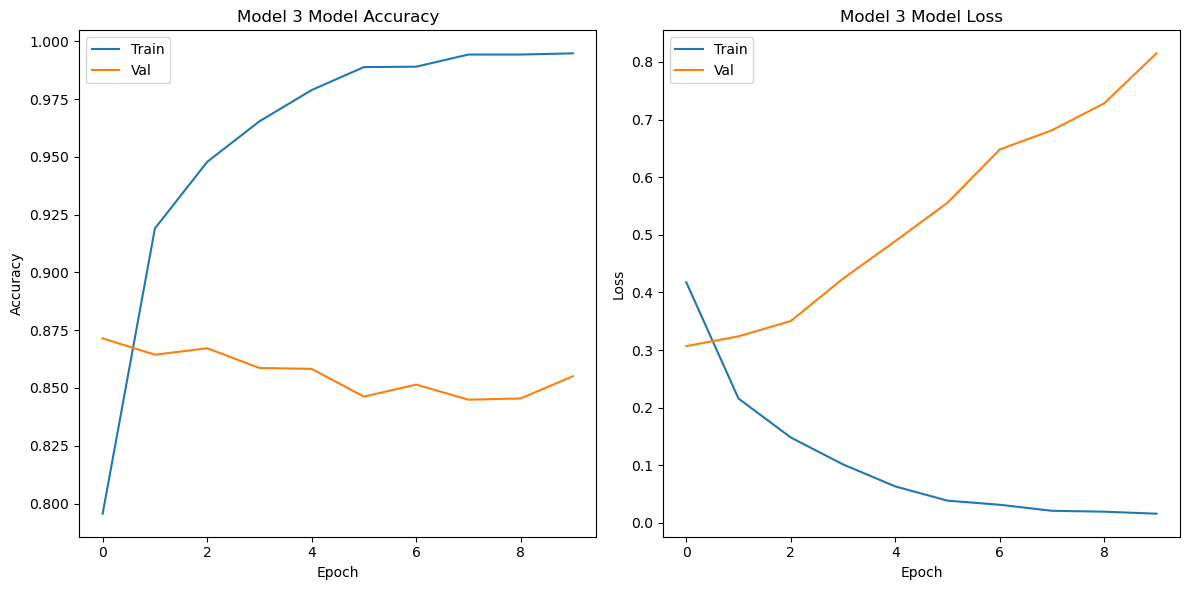

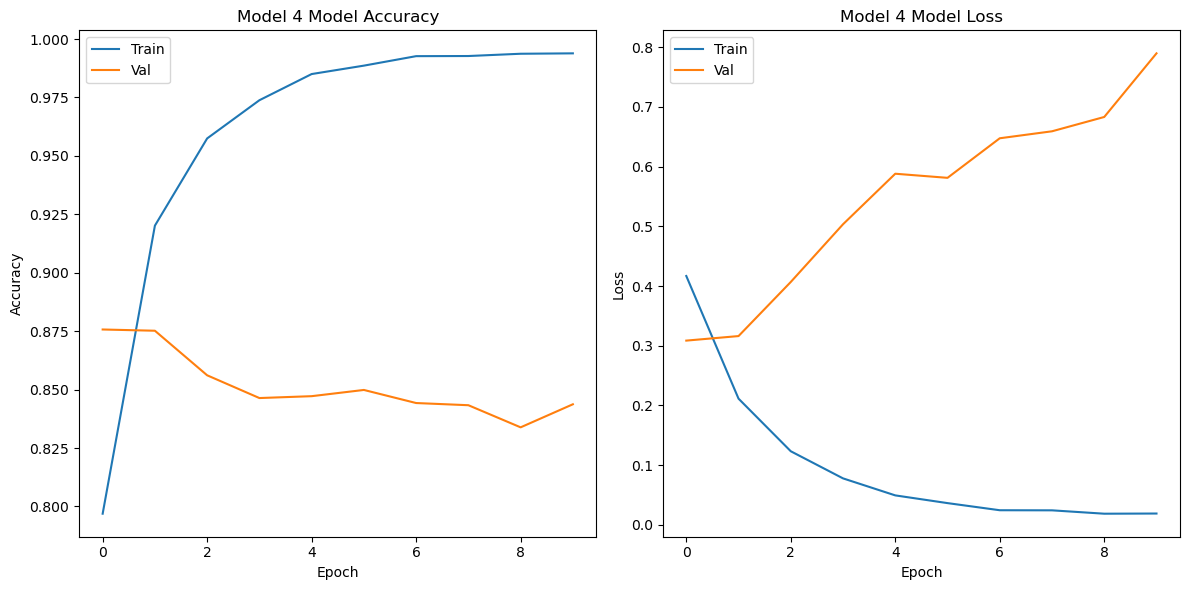

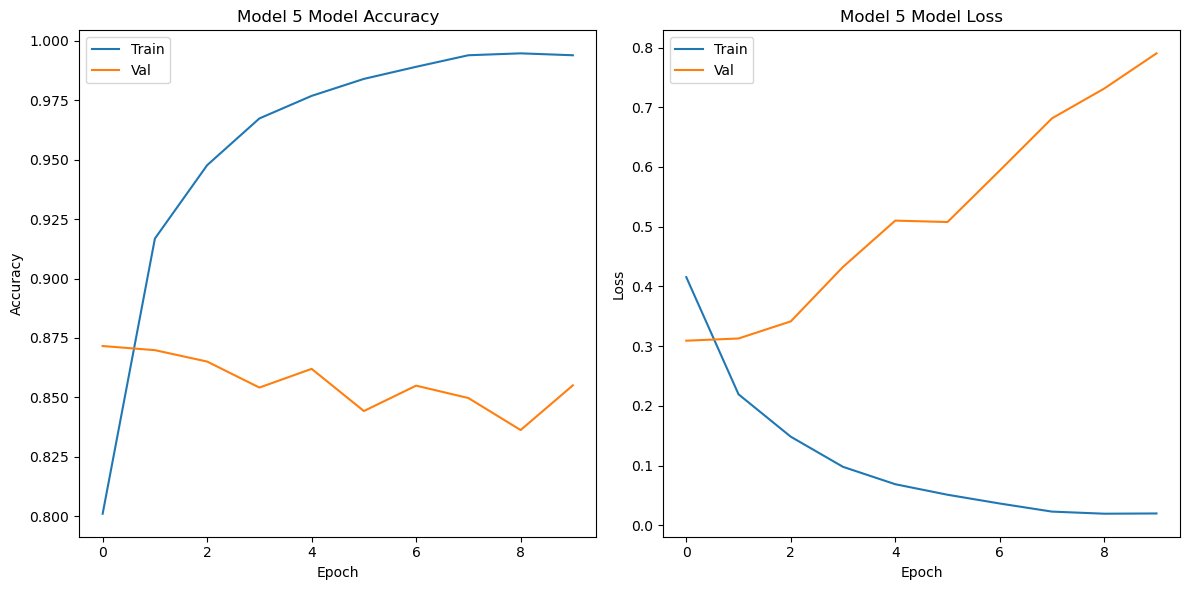

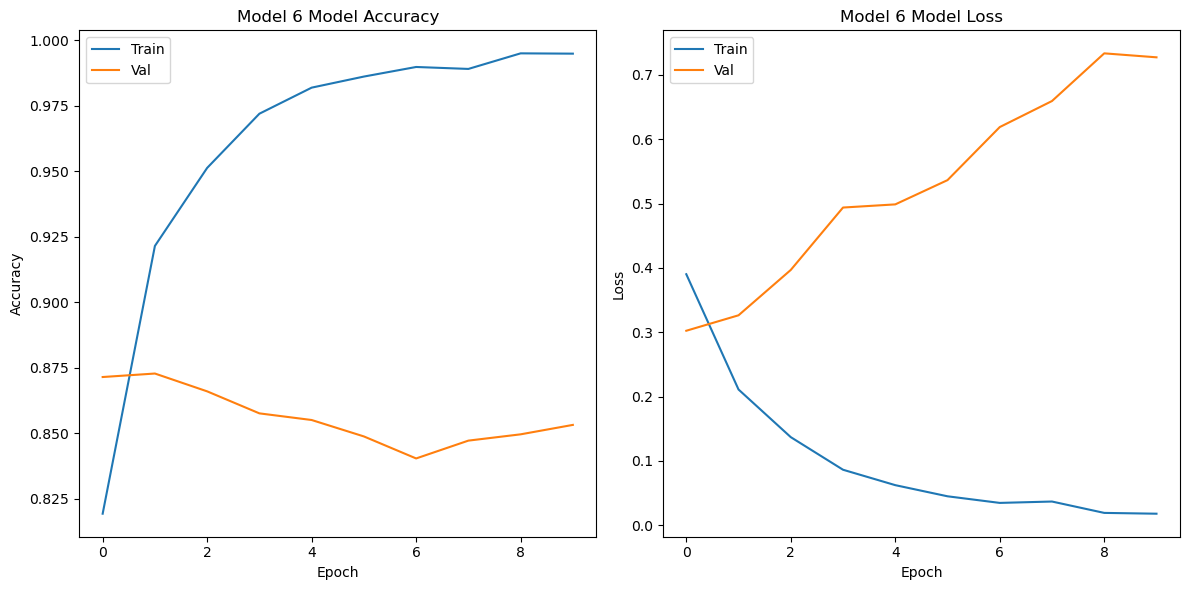

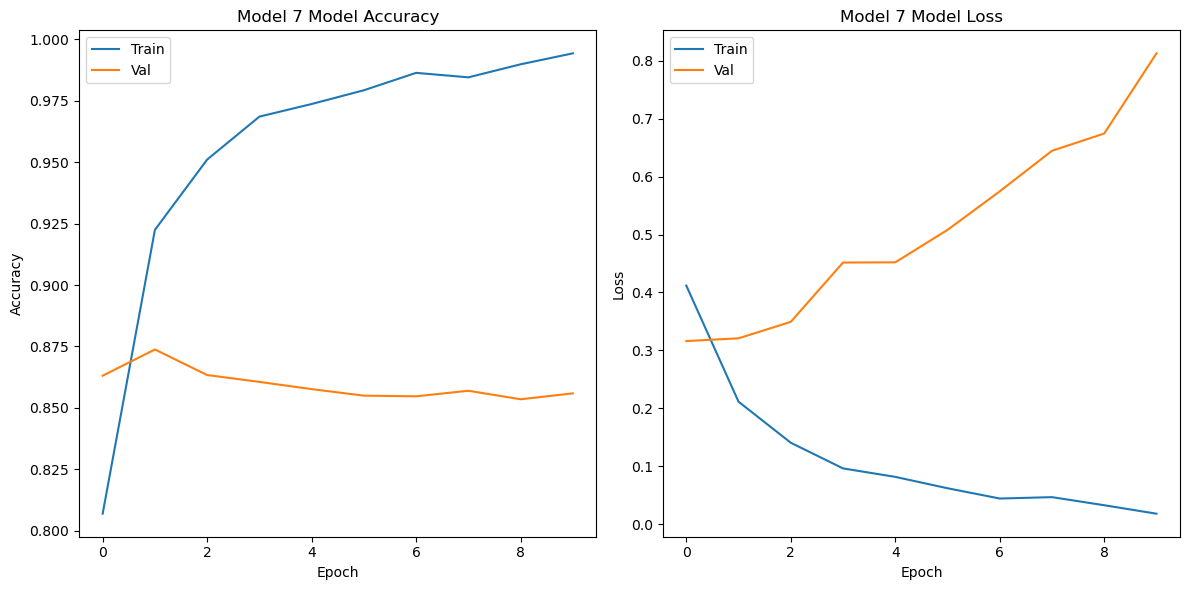

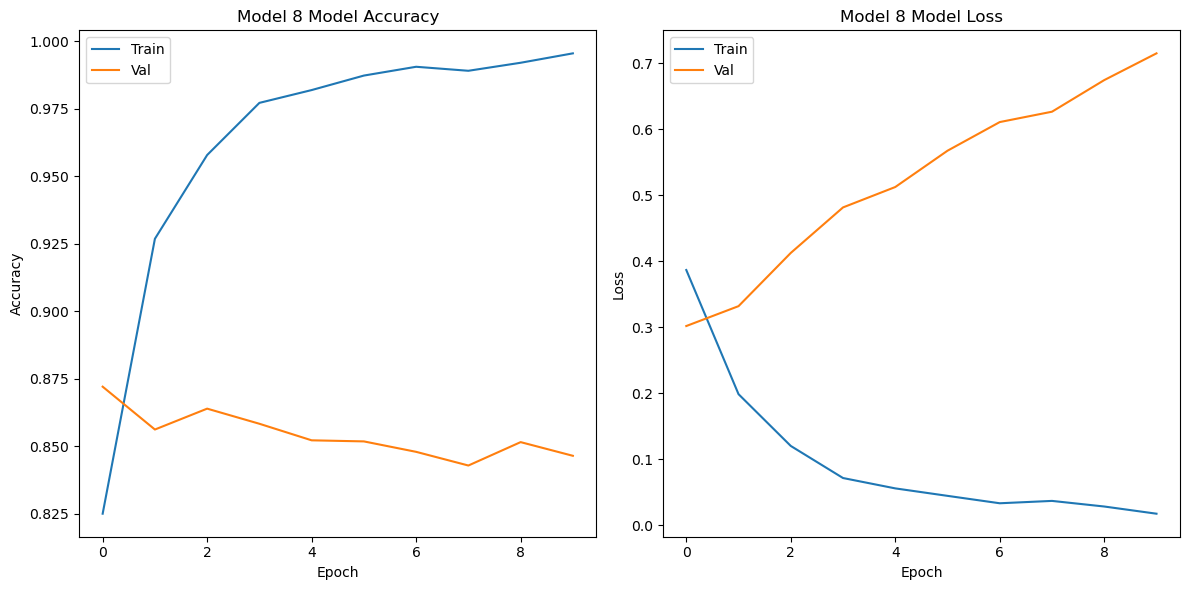

Mean Validation Accuracy - Model 1: 0.8607
Mean Validation Accuracy - Model 2: 0.8549
Mean Validation Accuracy - Model 3: 0.8563
Mean Validation Accuracy - Model 4: 0.8516
Mean Validation Accuracy - Model 5: 0.8563
Mean Validation Accuracy - Model 6: 0.8562
Mean Validation Accuracy - Model 7: 0.8594
Mean Validation Accuracy - Model 8: 0.8544

Best Mean Validation Accuracy: 0.8607


In [7]:
# Function to plot loss and accuracy curve
def plot_history(history, model_name):
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['acc'])
    plt.plot(history.history['val_acc'])
    plt.title(f'{model_name} Model Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend(['Train', 'Val'], loc='upper left')
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title(f'{model_name} Model Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend(['Train', 'Val'], loc='upper left')
    plt.tight_layout()
    plt.show()

# Plotting accuracy and loss curves for each model
plot_history(history_1, "Model 1")
plot_history(history_2, "Model 2")
plot_history(history_3, "Model 3")
plot_history(history_4, "Model 4")
plot_history(history_5, "Model 5")
plot_history(history_6, "Model 6")
plot_history(history_7, "Model 7")
plot_history(history_8, "Model 8")

# Function to calculate mean validation accuracy
def mean_validation_accuracy(history):
    val_acc = history.history['val_acc']
    mean_acc = np.mean(val_acc)
    return mean_acc

# Calculate and print mean validation accuracy for each model
mean_acc_1 = mean_validation_accuracy(history_1)
mean_acc_2 = mean_validation_accuracy(history_2)
mean_acc_3 = mean_validation_accuracy(history_3)
mean_acc_4 = mean_validation_accuracy(history_4)
mean_acc_5 = mean_validation_accuracy(history_5)
mean_acc_6 = mean_validation_accuracy(history_6)
mean_acc_7 = mean_validation_accuracy(history_7)
mean_acc_8 = mean_validation_accuracy(history_8)

# Print mean validation accuracies for each model
print(f"Mean Validation Accuracy - Model 1: {mean_acc_1:.4f}")
print(f"Mean Validation Accuracy - Model 2: {mean_acc_2:.4f}")
print(f"Mean Validation Accuracy - Model 3: {mean_acc_3:.4f}")
print(f"Mean Validation Accuracy - Model 4: {mean_acc_4:.4f}")
print(f"Mean Validation Accuracy - Model 5: {mean_acc_5:.4f}")
print(f"Mean Validation Accuracy - Model 6: {mean_acc_6:.4f}")
print(f"Mean Validation Accuracy - Model 7: {mean_acc_7:.4f}")
print(f"Mean Validation Accuracy - Model 8: {mean_acc_8:.4f}")